# Program - plotting 2D countour with matplotlib

**Purpose**
- Learn to use matplotlib to plot 2D contour

**Content**

**Author:** Yi-Hsuan Chen (yihsuan@umich.edu)

**Date:** 

**Reference:** 

- matplotlib demo
  - Contour Demo, https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html
  - Contourf Demo, https://matplotlib.org/stable/gallery/images_contours_and_fields/contourf_demo.html

- Colors
  - Colormaps in Matplotlib, https://matplotlib.org/stable/tutorials/colors/colormaps.html

- Nice examples
  - https://education.molssi.org/python-visualization/matplotlib/contour.html
  - https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html



In [1]:
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types

import yhc_module as yhc

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

## Create sample data

In [2]:
#--- X, Y, Z

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 7, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y) * 100.

In [3]:
#--- from SCM

#--- open SCM file
datapath = "../data/"
filename_scm = "20030701.atmos_cgils.nc"
file_scm = datapath+"/"+filename_scm

da_scm = xr.open_dataset(file_scm)

#da_scm.temp

## Plot 2D contour filled colors

In [30]:
#---------------------------
# set plt default settings
#---------------------------

#--- set default values for font group
font_default = {
    'size': 15,      # font size 
       }
#--- set default values for lines group
lines_default = {
    'linewidth':3,
}

# using rc function to read the default settings
plt.rc('font', **font_default)
plt.rc('lines', **lines_default)


Text(0, 0.5, 'yy')

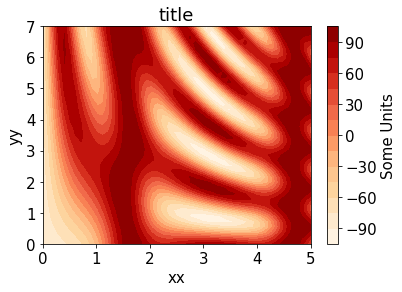

In [31]:
fig, ax = plt.subplots()

#--- determine contour levels
#cn_levels = np.array([-100., -50., -20., 0., 20., 50., 100.])
cn_levels = np.linspace(-100., 100., 10)

#--- plot contour
#      colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plot_cn = ax.contourf(X, Y, Z, 15, cmap="OrRd")  # automatically 10 levels  reversed cmap "OrRd_r"
#plot_cn = ax.contourf(X, Y, Z, levels = cn_levels)  # use explicit levels

#--- set label bar
fig.colorbar(plot_cn, orientation='vertical', label='Some Units')
#fig.colorbar(plot_cn, orientation='horizontal', label='Some Units', pad=0.2)

#for c in plot_cn.collections:
#    c.set_rasterized(True)
    
#--- set X & Y labels
ax.set_title("title")
ax.set_xlabel("xx")
ax.set_ylabel("yy")

## Plot 2D contour filled colors in subplots

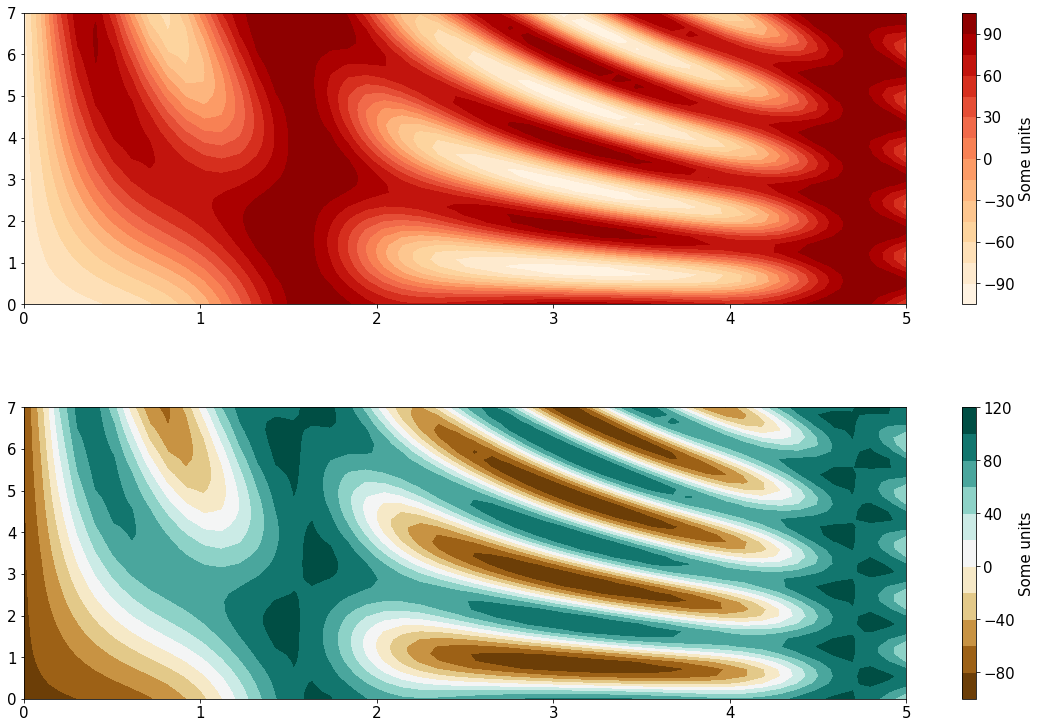

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(18, 12))   # 2 row, 1 column
fig.tight_layout(pad=5.0)

#--- ax1
plot_cn1 = ax1.contourf(X, Y, Z, 15, cmap="OrRd")  # automatically 10 levels  reversed cmap "OrRd_r"
fig.colorbar(plot_cn1, ax=ax1, orientation='vertical', label='Some units')

#--- ax2
plot_cn2 = ax2.contourf(X, Y, Z, 10, cmap="BrBG")  # automatically 10 levels  reversed cmap "OrRd_r"
fig.colorbar(plot_cn2, ax=ax2, orientation='vertical', label='Some units')


## Use the same color scale for all plots

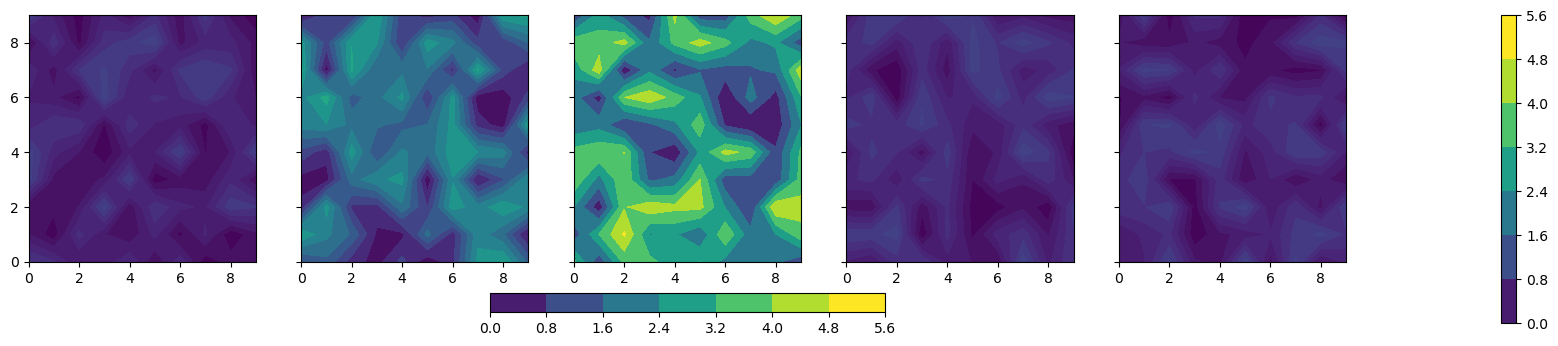

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have some data for the plots (replace this with your data)
data1 = np.random.rand(10, 10)
data2 = np.random.rand(10, 10) * 3
data3 = np.random.rand(10, 10) * 5
data4 = np.random.rand(10, 10)
data5 = np.random.rand(10, 10)

# Create a figure and subplots
#   sharex=True and sharey=True ensure that all subplots share the same x and y axis limits. 
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

# Choose a common color normalization
#norm = plt.Normalize(vmin=np.min([data1, data2, data3, data4, data5]), vmax=np.max([data1, data2, data3, data4, data5]))
norm = plt.Normalize(vmin=0, vmax=5)

# Plot the contour plots
contour1 = axs[0].contourf(data1, norm=norm)
contour2 = axs[1].contourf(data2, norm=norm)
contour3 = axs[2].contourf(data3, norm=norm)
contour4 = axs[3].contourf(data4, norm=norm)
contour5 = axs[4].contourf(data5, norm=norm)

# Create a common color bar.
#   fraction: larger values, larger color bar
#   pad: distance between color bar and the figures
#cbar = fig.colorbar(contour5, ax=axs, orientation='vertical', fraction=0.05, pad=0.01)

cbar_vertical = fig.colorbar(contour3, ax=axs, orientation='vertical', fraction=0.05, pad=0.1, extend='both')

cbar_horizontal = fig.colorbar(contour3, ax=axs, orientation='horizontal', fraction=0.1, pad=0.1, shrink=0.3, extend='both')


# Add labels, titles, etc., as needed

# Show the plots
#plt.show()

#data2

## subplots

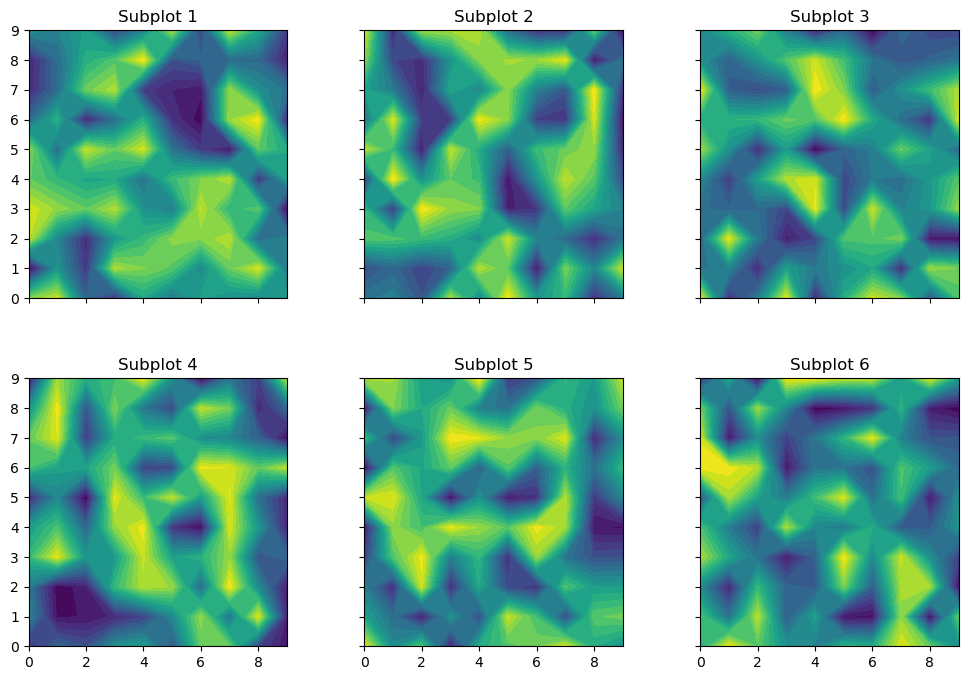

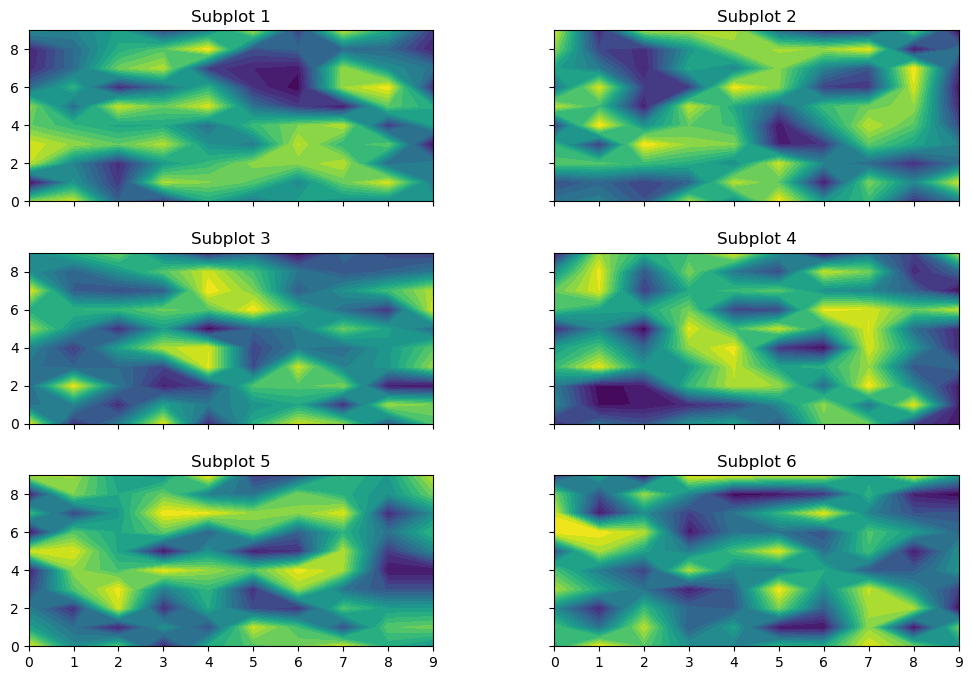

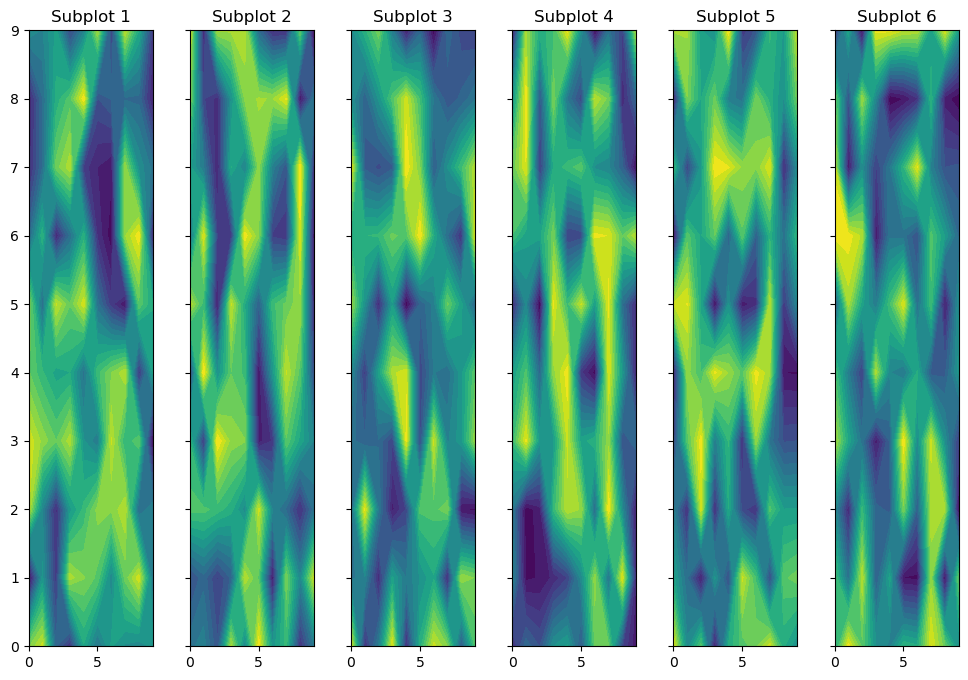

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have some data for the plots (replace this with your data)
data = [np.random.rand(10, 10) * 3 for _ in range(6)]

# Function to create subplots with specified layout
def create_subplots(layout):
    fig, axs = plt.subplots(*layout, figsize=(12, 8), sharex=True, sharey=True)
    return fig, axs

# Try different layouts
layouts = [(2, 3), (3, 2), (1,6)]  # You can add more layouts to try

for layout in layouts:
    fig, axs = create_subplots(layout)
    
    # Plot your data in each subplot
    for i, ax in enumerate(axs.flatten()):
        ax.contourf(data[i], cmap='viridis', levels=20)
        ax.set_title(f'Subplot {i + 1}')

    # Adjust layout parameters
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust as needed

    plt.show()

## Plot 2D contour lines

Text(0, 0.5, 'yy')

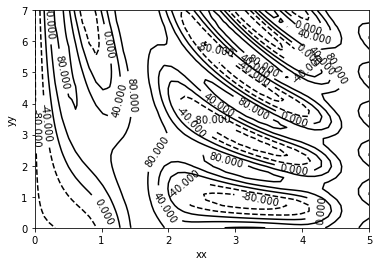

In [5]:
fig, ax = plt.subplots()

plot_cn = ax.contour(X, Y, Z, 5, colors='black')

ax.clabel(plot_cn, inline=True, fontsize=10)

#--- set X & Y labels
ax.set_xlabel("xx")
ax.set_ylabel("yy")
